In [ ]:
!pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing

data = pd.read_excel("/content/UoW Data 2024_25.xlsx", sheet_name=1) #this function openes the second sheet within the excel file

In [ ]:
data.info() #i used this function to view if i correctly openend the desired sheet, to view the columns and names, their data types and to view if there are any missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 14 columns):
 #   Column                                                                        Non-Null Count  Dtype 
---  ------                                                                        --------------  ----- 
 0   Timestamp                                                                     132 non-null    object
 1   Ethnicity                                                                     115 non-null    object
 2   Nationality                                                                   112 non-null    object
 3   No Of Dependents / Children                                                   100 non-null    object
 4   Shoe Size (UK) 
Please enter a UK shoe size.                                  195 non-null    object
 5   What are the shoes needed for?                                                114 non-null    object
 6   Employment Status                         

In [ ]:
#with this function i rename the colums by shortening them so it is more readable
new_column_names = [
    'Timestamp',
    "ethnicity",
    "nationality",
    "No_Of_Dependents/Children",
    "uk_shoe_size",
    "shoe_purpose",
    "employment_status",
    "Do_you_receive_Universal_Credit?",
    "education/training",
    "looked_after_or_care_leaver",
    "recently_released_prison(in the last 6 months)",
    "seeking_asylum",
    "youth_support",
    "resole_source"
]
data.columns = new_column_names

data.to_csv("cleaned_data.csv", index=False)
print("Data loaded and columns renamed successfully!")

Data loaded and columns renamed successfully!


In [ ]:
#I have dropped these columns as they are unessary and serve no purpose for our task in hand
data = data.drop(columns=(['Timestamp', "uk_shoe_size"]))

Missing values per column:
 ethnicity                                          89
nationality                                        92
No_Of_Dependents/Children                         104
shoe_purpose                                       90
employment_status                                  61
Do_you_receive_Universal_Credit?                   90
education/training                                 90
looked_after_or_care_leaver                        90
recently_released_prison(in the last 6 months)     90
seeking_asylum                                     90
youth_support                                      91
resole_source                                     100
dtype: int64
Data types:
 ethnicity                                         object
nationality                                       object
No_Of_Dependents/Children                         object
shoe_purpose                                      object
employment_status                                 object
Do_you_receiv

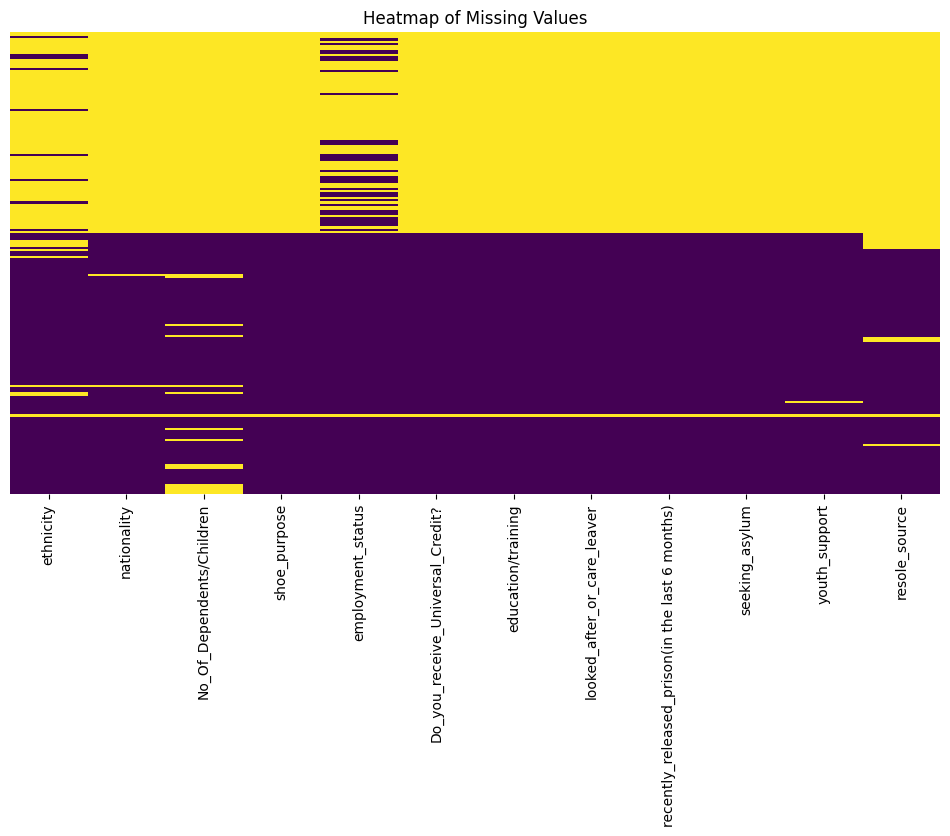

In [ ]:
#With this code i created a heatmap that identified columns that have mising values
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)

print("Data types:\n", data.dtypes)


plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Heatmap of Missing Values")
plt.show()

In [ ]:
data = data.dropna(thresh=len(data.columns)-3)  #This drops rows with 3 or more missing values (unsalvageable data)

In [ ]:
data.isna().sum()/len(data)*100 #This function informs me of the percentage of missing values per column

,0
ethnicity,7.017544
nationality,1.754386
No_Of_Dependents/Children,12.280702
shoe_purpose,0.000000
employment_status,0.000000
Do_you_receive_Universal_Credit?,0.000000
education/training,0.000000
looked_after_or_care_leaver,0.000000
recently_released_prison(in the last 6 months),0.000000
seeking_asylum,0.000000


In [ ]:
#This function shows me all the values within this column so I would be able to standardise the values
data["No_Of_Dependents/Children"].unique()

array([0, 1, '3 kids', '3 chlid', 3, 'no', 'No', nan, 2, 5, 4, 'Children',
       '3 childrens', 'I am alone', 'No '], dtype=object)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114 entries, 89 to 203
Data columns (total 12 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   ethnicity                                       106 non-null    object
 1   nationality                                     112 non-null    object
 2   No_Of_Dependents/Children                       100 non-null    object
 3   shoe_purpose                                    114 non-null    object
 4   employment_status                               114 non-null    object
 5   Do_you_receive_Universal_Credit?                114 non-null    object
 6   education/training                              114 non-null    object
 7   looked_after_or_care_leaver                     114 non-null    object
 8   recently_released_prison(in the last 6 months)  114 non-null    object
 9   seeking_asylum                                  114 non-nu

In [ ]:
#With this block of code i encoded the values
#data['No_Of_Dependents/Children'] = data['No_Of_Dependents/Children'].map({'3 kids': 3, '3 chlid': 3, 'no': 0, 'No': 0, 'No ': 0, 'Children': 1,'3 childrens': 3, 'I am alone': 0, '0': 0, '1': 1, '3': 3, '2': 2, '5': 5, '4': 4,})



data.loc['No_of_Dependents/children'] = data['No_of_Dependents/children'].map({'3 kids': 3, '3 chlid': 3, 'no': 0, 'No': 0, 'No ': 0, 'Children': 1,'3 childrens': 3, 'I am alone': 0, '0': 0, '1': 1, '3': 3, '2': 2, '5': 5, '4': 4,})

KeyError: 'No_of_Dependents/children'

In [ ]:
data.info()

In [ ]:
# I perfomerd this to check if my code was succesfully executed
data["No_Of_Dependents/Children"].unique()

In [ ]:
#This function shows me all the values within this column so I would be able to standardise the values
data['ethnicity'].unique()

In [ ]:
# this code shoes the distribution of values so i am able to compare the before and after to see if the standardising was executed correctly
data['ethnicity'].value_counts()

In [ ]:
#This function shows me all the values within this column so I would be able to standardise the values
data['nationality'].unique()

In [ ]:
# this code shoes the distribution of values so i am able to compare the before and after to see if the standardising was executed correctly
data['nationality'].value_counts()

In [ ]:
#with this code i mapped the ethnicity and nationality columns to standardise them

ethnicity_mapping = {
    "Asian or Asian British": ["Asian", "South Asian", "Pakistan", "Balochistan (Pakistan)", "India", "Indian", "Bangladeshi", "Bangladeshi ", "Filipino", "Srilankan "],

    "Black, Black British, Caribbean or African": ["British African", "African caribbean british", "African", "African caribbean british ", "Caribbean british ", "Caribbean", "Black ",
                                                   "Black Caribbean ", "Black African", "Black African ", "Black British ", "Black british ", "Black - African",
                                                   "Africa ", "Africans ", "African ", "Sierra Leonean ", "Eritrean", "Ethiopian", "Sudanese", "Africans  Black ", "Black", "Black  Caribbean "],

    "Mixed or Multiple Ethnic Groups": ["Mixed", "Mixed Race ", "Mix", "Mix black white", "Europe mixed raced"],

    "White": ["British", "British ", "White", "White ", "White / English", "White British", "EUROPIAN", "English", "Irish", "German", "Romanian", "Polish", "Spanish", "albanian", "Cypriot"],

    "Other Ethnic Groups": ["Kurdish", "Kurd", "Irani ", "Iran", "Persian", "Iranian", "Arab", "Arab ", "Arab without kuwait", "Arabic", "South american", "Latino", "Latioamericana", "Afghani", "Afghani ", "Afghanistan ", "Afghan"],

    "Unknown": ["Not know", "male", "london"]


}

nationality_mapping = {

    "Asian": ["Asian"],

    "Afghanistan" : ["Afghan", "Afghani", "Afghanistan", "Afghanistan "],

    "Pakistani" : ["Pakistani ", "Balochistani"],

    "Indian" : ["Indian"],

    "Srilankan" : ["Srilankan "],

    "Carribea": ["Carribean "],

    "Gambian": ["Gambian"],

    "Mauritian": ["Mauritian"],

    "Congolese": ["Congolese ", "Democratic Republic of Congo "],

    "Chadian": ["Chadian "],

    "Somali": ["SOMALI"],

    "Sierra Leonean": ["Sierra leone"],

    "Eritrean": ["Eritrean ", "Eritrean"],

    "Ethiopian": ["Ethiopian ", "Ethiopian"],

    "Sudanese": ["Sudanese "],

    "Botswanaan": ["Motswana ", "Motswana0", "Motswana"],

    "Namibian": ["Namibian"],

    "Egypt": ["Egypt"],

    "Nigera": ["Nigerian ", "Nigeria "],

    "German": ["German "],

    "Spanish": ["Spanish ", "Spanish"],

    "Italian": ["Italian "],

    "Albanian": ["Albanian", "ALBENIAN", "albania"],

    "British": ["Kittisian/British", "British", "British ", "Brithish", "Brit ", "English", "UK national", "Uk"],

    "Irish": ["irish"],

    "Romania": ["Romanian"],

    "Polish": ["Polish"],

    "Iran": ["Iranian ", "Iranian", "Iran", "Iran "],

    "Kuwait": ["Kuwait"],

    "Jordanian": ["Jordanian"],

    "Iraqi": ["Iraqi"],

    "Syrian": ["Syrian", "Syria "],

    "Yemen": ["Yemen"],

    "Brazil": ["Brasileiro ", "Brazilian"],

    "Colombian": ["Colombia "],

    "Venezuelan": ["Venezuelan"],

    "Unknown": ["Refugee Status granted in 2024", "Asylum seeker", "Not known"]

}


def standardize_column_values(column, mapping):
    for standard, variants in mapping.items():
        column = column.replace(variants, standard)
    return column


data["ethnicity"] = standardize_column_values(data["ethnicity"], ethnicity_mapping)
data["nationality"] = standardize_column_values(data["nationality"], nationality_mapping)


cleaned_file_path = "/content/cleaned_data.csv"
data.to_csv(cleaned_file_path, index=False)

cleaned_file_path

In [ ]:
# I perfomerd this to check if my code was succesfully executed
data['ethnicity'].unique()

In [ ]:
# I perfomerd this to check if my code was succesfully executed
data['ethnicity'].value_counts()

In [ ]:
# I perfomerd this to check if my code was succesfully executed
data['nationality'].unique()

In [ ]:
# I perfomerd this to check if my code was succesfully executed
data['nationality'].value_counts()

In [ ]:
#This function shows me all the values within this column so I would be able to standardise the values
data['Do_you_receive_Universal_Credit?'].unique()

In [ ]:
# this code shoes the distribution of values so i am able to compare the before and after to see if the standardising was executed correctly
data['Do_you_receive_Universal_Credit?'].value_counts()

In [ ]:
#This function shows me all the values within this column so I would be able to standardise the values
data['recently_released_prison(in the last 6 months)'].unique()

In [ ]:
# this code shoes the distribution of values so i am able to compare the before and after to see if the standardising was executed correctly
data['recently_released_prison(in the last 6 months)'].value_counts()

In [ ]:
#This function shows me all the values within this column so I would be able to standardise the values
data['education/training'].unique()

In [ ]:
# this code shoes the distribution of values so i am able to compare the before and after to see if the standardising was executed correctly
data['education/training'].value_counts()

In [ ]:
#This function shows me all the values within this column so I would be able to standardise the values
data['looked_after_or_care_leaver'].unique()

In [ ]:
# this code shoes the distribution of values so i am able to compare the before and after to see if the standardising was executed correctly
data['looked_after_or_care_leaver'].value_counts()

In [ ]:
#This function shows me all the values within this column so I would be able to standardise the values
data['seeking_asylum'].unique()

In [ ]:
# this code shoes the distribution of values so i am able to compare the before and after to see if the standardising was executed correctly
data['seeking_asylum'].value_counts()

In [ ]:
#This function shows me all the values within this column so I would be able to standardise the values
data['youth_support'].unique()

In [ ]:
# this code shoes the distribution of values so i am able to compare the before and after to see if the standardising was executed correctly
data['youth_support'].value_counts()

In [ ]:
data.info()

In [ ]:
#with this code i encoded and mapped the following variables in order to make the dataset more readable
label_encoder = preprocessing.LabelEncoder()

data["Do_you_receive_Universal_Credit?"]= label_encoder.fit_transform(data["Do_you_receive_Universal_Credit?"]) #1 yes i have, 0 no im havent

data["recently_released_prison(in the last 6 months)"]= label_encoder.fit_transform(data["recently_released_prison(in the last 6 months)"]) #1 yes i have, 0 no im havent

data["education/training"] = data["education/training"].map({"No": 0 , "Yes": 1 , "Asylum seeker": 0 , "asylum seeker": 0 , "Voluntary work in the charity sector": 0 , "Gym": 0 , "Just started a CSC 4 week course": 1 ,
                                                             "starting at West London College Hammersmith next week": 1 , "Finalising my foundation in music therapy for people with dementia. I can assist music therapists or do music freelancing work with seniors": 1 ,
                                                             "Not yet still waiting to do English": 1 , "Im on  the waiting list": 0 , "Im in the waiting list": 0 , "Croydon College": 0 , "ESOL": 1}) #education = 0 #training = 1

data["looked_after_or_care_leaver"] = data["looked_after_or_care_leaver"].map({"No": 0 , "Yes": 1 , "Father": 0 , "Guardian": 0 , "young asylum seeker": 1 , "Yes by Hotel stuff":1})  # 1 yes i am, 0 no im not

data["seeking_asylum"] = data["seeking_asylum"].map({"Victim of trafficking/modern slavery (NRM)": 1 , "Yes": 1 , "No": 0 , "Asylum seeker": 1 , "Refugee": 0 , "I am seeking Assylum in the UK": 1 , "Refugee Status (5 years)": 0}) # 1 yes i am, 0 no im not

data["youth_support"] = data["youth_support"].map({"Advocacy worker": 0 , "Advocate": 0 , "No": 0 , "Yes": 1 , "Support worker from Hestia Charity": 0 , "Outreach Advocate": 0 , "refuge support worker": 0 , "Social Prescriber": 0 ,
                                                   "Outreach Advocate Hestia Modern Slavery Response Team": 0 , "Im in the Home Office hotel accommodation": 0 , "Yes, No": 0}) # 1 yes i am 0 no im not

output_file = "cleaned_data.csv"
data.to_csv(output_file, index=False)
print(f"Data saved as {output_file} after modifications.")

In [ ]:
data.info()

In [ ]:
# I perfomerd this to check if my code was succesfully executed
data['Do_you_receive_Universal_Credit?'].value_counts()

In [ ]:
# I perfomerd this to check if my code was succesfully executed
data['Do_you_receive_Universal_Credit?'].unique()

In [ ]:
# I perfomerd this to check if my code was succesfully executed
data['recently_released_prison(in the last 6 months)'].value_counts()

In [ ]:
# I perfomerd this to check if my code was succesfully executed
data['recently_released_prison(in the last 6 months)'].unique()

In [ ]:
# I perfomerd this to check if my code was succesfully executed
data['education/training'].value_counts()

In [ ]:
# I perfomerd this to check if my code was succesfully executed
data['education/training'].unique()

In [ ]:
# I perfomerd this to check if my code was succesfully executed
data['looked_after_or_care_leaver'].value_counts()

In [ ]:
# I perfomerd this to check if my code was succesfully executed
data['looked_after_or_care_leaver'].unique()

In [ ]:
# I perfomerd this to check if my code was succesfully executed
data['seeking_asylum'].value_counts()

In [ ]:
# I perfomerd this to check if my code was succesfully executed
data['seeking_asylum'].unique()

In [ ]:
# I perfomerd this to check if my code was succesfully executed
data['youth_support'].value_counts()

In [ ]:
# I perfomerd this to check if my code was succesfully executed
data['youth_support'].unique()

In [ ]:
data.info()

In [ ]:
data['ethnicity'].fillna(data['ethnicity'].mode()[0], inplace=True)
data['nationality'].fillna(data['nationality'].mode()[0], inplace=True)
data['No_Of_Dependents/Children'].fillna(data['No_Of_Dependents/Children'].mode()[0], inplace=True)
data['education/training'].fillna(data['education/training'].mode()[0], inplace=True)
data['looked_after_or_care_leaver'].fillna(data['looked_after_or_care_leaver'].mode()[0], inplace=True)
data['recently_released_prison(in the last 6 months)'].fillna(data['recently_released_prison(in the last 6 months)'].mode()[0], inplace=True)
data['seeking_asylum'].fillna(data['seeking_asylum'].mode()[0], inplace=True)
data['youth_support'].fillna(data['youth_support'].mode()[0], inplace=True)

data.to_csv("/content/cleaned_data.csv", index=False)

print("Filling missing values completed!")

In [ ]:
data.info()